# BME4760 HW1

## Loading Data
Loading the necessary libraries in order to preprocess and plot the database:<br>
numpy   | Arrays <br>
pandas  | Data structure organization <br>
matplot | Plotting and Figures <br>
seaborn | Even more plotting capabilities <br>
<br>
These libraries will help to process, work, and display the grids.

In [1]:
# Downloading the Post-Operative Patient Data Set
# http://archive.ics.uci.edu/ml/datasets/Post-Operative+Patient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data from the URL path as a data frame and giving the dataframe column names once it is imported with 'names' array.

In [2]:
# URL path for Post-Operative Dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/postoperative-patient-data/post-operative.data'

# Downloading File and Loading Dataset
names = ['L-CORE','L-SURF','L-02','L-BP','SURF-STBL','CORE-STBL','BP-STBL','COMFORT','decision ADM-DECS']
df = pd.read_csv(url,names=names)

> OPTIONAL display so I could see all the rows and confirm the missing values

In [3]:
# Displays all rows by increasing display limit
pd.options.display.max_rows=100

## Pre-processing Data
I opted to do the preprocessing first due to the unknown '?' values in the initial data frame. In total there are 3 missing values within the COMFORT column and must be dealt with. While it would still plot, it would be better to view the relationships without the unknown values. It would be hard to use a linear interpolation since the data column is not a continuous data set. Therefore, I removed the rows where '?' were present. This wouldn't impact the results too much since there are only 3 missing values and 3 removed patients from the dataset. <br>

In order to remove the patients with ? values, I first used a replacing function to replace the '?' with a NaN from numpy. Then I can use dropna to remove the rows with NaN. Due to the seaborn plotting, the data that we used must be numeric for the COMFORT column. COMFORT is a numeric value that we use and has a defined order. Without this conversion, the strings are out of order when plotted. Most likely when uploading the dataframe this way through pandas, the COMFORT column is uploaded as a series and is converted with <b>"to_numeric"</b> into numeric values. 

In [15]:
# Convert '?' to NaN and remove relative rows
df_Processed = df.replace({'?':np.nan}).dropna()

# Removed extra white spaces
df_Processed = df_Processed.replace({'A ':'A'})

# Converting COMFORT series into numeric values
df_Processed["COMFORT"] = pd.to_numeric(df_Processed["COMFORT"])

# Printing shapes and the pre-processed table
# proves the removal of 3 rows
print(df.shape)
print(df_Processed.shape)
df_Processed

(90, 9)
(87, 9)


,L-CORE,L-SURF,L-02,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
5,high,low,good,mid,stable,stable,unstable,15,S
6,mid,low,excellent,high,stable,stable,mod-stable,5,S
7,high,mid,excellent,mid,unstable,unstable,stable,10,S
8,mid,high,good,mid,stable,stable,stable,10,S
9,mid,low,excellent,mid,unstable,stable,mod-stable,10,S


## Plotting relationships
I used <b>seaborn</b> library for this relationship plotting. Specifically a categorical graphing method for graphing the relationships of categories among a scale. A new figure is made for each plot and uses the processed data from the previous section. The order for each was based on the <b>"post-operative.names"</b> file. Counting the individual patients with each categorical feature isn't as significant since the connection between the categorical feature and COMFORT is what we want to evaluate.
<br>
### Interpretations Summary
L-CORE    | Patient's Internal Temperature in C        |<br>
L-SURF    | Patient's Surface Temperature in C         |<br>
L-02      | Oxygen Saturation in %                     |<br>
L-BP      | Last Measurement of Blood Pressure         |<br>
SURF-STBL | Stability of Patient's Surface Temperature |<br>
CORE-STBL | Stability of Patient's Core Temperature    |<br>
BP-STBL   | Stability of Patient's Blood Pressure      |<br>
decision ADM-DECS | Discharge Decision                 |<br>

#### L-CORE
<b>Patient's Internal Temperature in Celsius</b><br>
L-CORE describes the internal temperatures within the patients in celsius. Mid indicates a body temperature in C from 36-37, which is the average body temperature of a normal human. This wouldn't be a significant factor in deciding where to send the patient after post op surgery since the low internal temperature is present among a lot of patients represented in green. Even with only around 2 actually sent to the ICU.

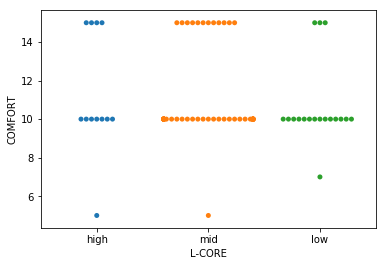

In [5]:
sns.swarmplot(x="L-CORE", y="COMFORT", data=df_Processed, orient="v", order = ["high","mid","low"])

#### L-SURF
<b>Patient's Surface Temperature in C </b> <br>
L-SURF describes the patient's surface temperature. This wouldn't also be an accurate measure to determine a patient's discharge decision. As many of the patients are spread among high, mid, and low temperature ranges. This could be a result of the postop recovery area being cold or hot. This includes a patient normally being hot or colder than normal.

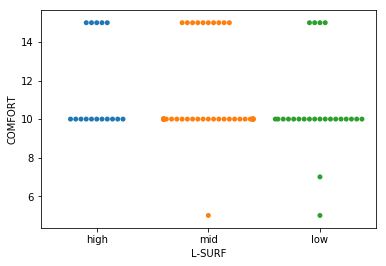

In [6]:
sns.swarmplot(x="L-SURF", y="COMFORT", data=df_Processed, orient="v", order = ["high","mid","low"])

#### L-02
<b> Oxygen Saturation in % </b><br>
All patients have good or greater oxygen saturation and are at good standing. There are a few instances where the comfort is waning for patients, but are still in good condition regardless. This could have a significant purpose in deciding for discharge decision since there are many patients that have average comfort level at discharge with very few that were uncomfortable at discharge. This could explain the few that were sent to ICU. Similar reasoning could apply to the patients sent home as the patients exhibiting the highest comfort could match the 24 patients sent home at discharge.

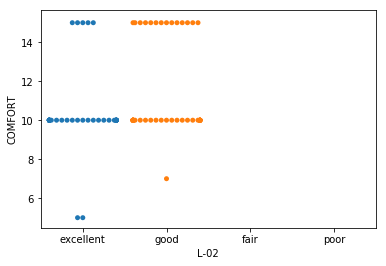

In [7]:
sns.swarmplot(x="L-02", y="COMFORT", data=df_Processed, orient="v", order = ["excellent","good","fair","poor"])

#### L-BP
<b> Last Measurement of Blood Pressure </b> <br>
Blood pressure measurements among most patients are at mid or high levels, meaning they most likely they don't have to be admitted to the Intensive Care Unit.
This describes the last measurement of blood pressure. Similar to the previous graphs, this could also be significant in the classification. A few individuals had low last measured blood pressure, assuming these are all measured relatively close to the discharge time. The majority of patients are at 10 comfort and this matches closely to the 64 patients that were sent to the general hospital floor.

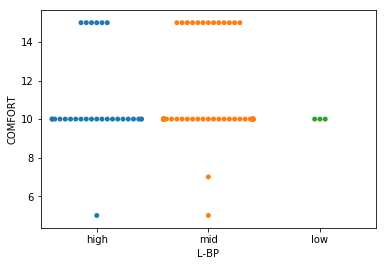

In [9]:
sns.swarmplot(x="L-BP", y="COMFORT", data=df_Processed, orient="v", order = ["high","mid","low"])

#### SURF-STBL
<b> Stability of Patient's Surface Temperature </b> <br>
The patient's surface temperatures are all either stable or unstable, none of which fall under mod-stable. The majority of these patients also fall within the comfort level of 10, meaning they are comfortable enough. The majority of patients lieing in the 10 comfort could describe the patients who were sent to the general hospital floor. It would be hard to decide if a large number of patients who have unstable surface temperatures, however the ones that are declaring a low comfort at discharge could be helpful in deciding the ICU admissions.

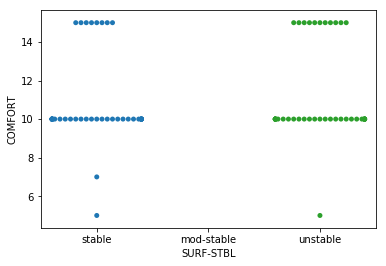

In [10]:
sns.swarmplot(x="SURF-STBL", y="COMFORT", data=df_Processed, orient="v", order = ["stable","mod-stable","unstable"])

#### CORE-STBL
<b> Stability of Patient's Core Temperature </b> <br>
The stability of the patient's core temperature majorly lies within the stable region. The unstable patients represent about 5 patients. This could be helpful in classification using the unstable core temperature and their accompanying temperature.

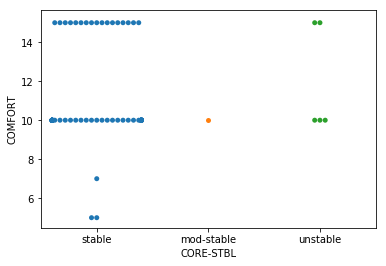

In [11]:
sns.swarmplot(x="CORE-STBL", y="COMFORT", data=df_Processed, orient="v", order = ["stable","mod-stable","unstable"])

#### BP-STBL
<b> Stability of Patient's Blood Pressure </b> <br>
The stabilitiy of the patient's blood pressure shows a great amount of patients being stable, along with patients being mod-stable and unstable as well. This would be a difficult metric to classify discharge decisions since there is almost an equal spread among all of these categories. Most of the patients are under the average level of comfort with a few being rather uncomfortable at the time of discharge.

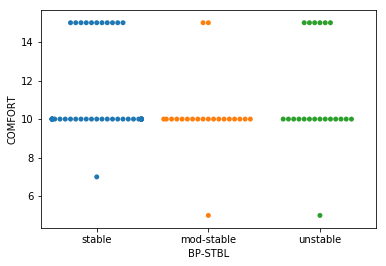

In [13]:
sns.swarmplot(x="BP-STBL", y="COMFORT", data=df_Processed, orient="v", order = ["stable","mod-stable","unstable"])

#### decision ADM-DECS
<b> Discharge Decision </b> <br>
The discharge decision wouldn't be as helpful since this is the decision after their discharge. Essentially this would be recorded right after that decision following the discharge. However, this helps to generalize and review the patients who were sent home, general hospital, and ICU. What would make sense is if the patients sent to the ICU were at low levels of comfort due to the discharge decision. The same could be applied to those being sent home. Their comfort levels shouldn't really fall too low, otherwise a different decision could have been made.

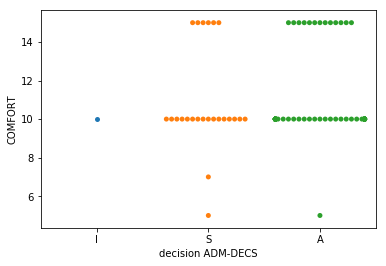

In [14]:
sns.swarmplot(x="decision ADM-DECS", y="COMFORT", data=df_Processed, orient="v", order = ["I","S","A"])